# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

## Observations
1. Max temperatures in the northern hemisphere are colder than on the Southern hemisphere. This is explained by the time of year that the data was retrieved.
2. There is a stronger correlation between max temperature and latitude in the Northern hemisphere compared to the Southern hemisphere.
3. Wind, humidy and coludiness have little correlation when compared to latitude.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

608

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#Test code
url = 'http://api.openweathermap.org/data/2.5/weather?'
units = 'imperial'

#Dictionary to build data frame
weather_info = {
    'City': [],
    'Cloudiness': [],
    'Country': [],
    'Date': [],
    'Humidity': [],
    'Lat': [],
    'Lng': [],
    'Max Temp': [],
    'Wind Speed': []
}

#Counter variable for loop iterations
count = 1

#Loop through cities to build dicitonary
for city in cities:
    
    #API call
    response = requests.get(f'{url}appid={weather_api_key}&units={units}&q={city}').json()
    
    #Sleep thread to avoid too many API calls
    time.sleep(0.5)

    #Try/except block to add data, will catch exception object if not found
    try:

        weather_info['City'].append(response['name'])
        weather_info['Cloudiness'].append(response['clouds']['all'])
        weather_info['Country'].append(response['sys']['country'])
        weather_info['Date'].append(response['dt'])
        weather_info['Humidity'].append(response['main']['humidity'])
        weather_info['Lat'].append(response['coord']['lat'])
        weather_info['Lng'].append(response['coord']['lon'])
        weather_info['Max Temp'].append(response['main']['temp_max'])
        weather_info['Wind Speed'].append(response['wind']['speed'])
        
        print(f'City# {count}, {city} has been found!')

    except KeyError:

        print(f'City# {count}, {city} has not been found, data could not be imported!')

    #Increment at loop end
    count += 1

as been found!
City# 89, tiksi has been found!
City# 90, esperance has been found!
City# 91, brovary has been found!
City# 92, praia has been found!
City# 93, kalemie has been found!
City# 94, atuona has been found!
City# 95, vaitupu has not been found, data could not be imported!
City# 96, arraial do cabo has been found!
City# 97, pilar has been found!
City# 98, port alfred has been found!
City# 99, la ronge has been found!
City# 100, fortuna has been found!
City# 101, yellowknife has been found!
City# 102, imbituba has been found!
City# 103, dikson has been found!
City# 104, wajir has been found!
City# 105, cabo san lucas has been found!
City# 106, albany has been found!
City# 107, east london has been found!
City# 108, ovsyanka has been found!
City# 109, samatau has not been found, data could not be imported!
City# 110, norman wells has been found!
City# 111, dingle has been found!
City# 112, belyy yar has been found!
City# 113, grand river south east has not been found, data could 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#Build dataframe and case to csv file
weather_df = pd.DataFrame(weather_info)
weather_df.to_csv('../output_data/cities.csv', index = False)

#Peek at dataframe
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Ponta do Sol,0,PT,1579963897,56,32.67,-17.10,64.00,5.01
1,Bandarbeyla,59,SO,1579963306,85,9.49,50.81,78.64,19.01
2,Kumul,0,CN,1579963713,79,42.80,93.45,8.85,2.57
3,Jamestown,100,US,1579963844,90,42.10,-79.24,39.00,8.01
4,Nishifukuma,100,JP,1579963901,93,33.77,130.47,48.00,10.65


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

<function matplotlib.pyplot.show(*args, **kw)>

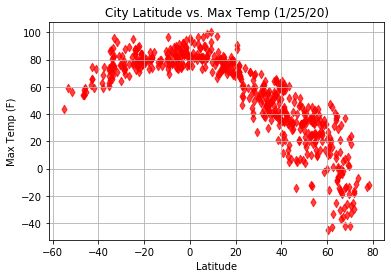

In [5]:
#Hold lists with data for each axis
x_axis = weather_df['Lat']
y_axis = weather_df['Max Temp']

#Build scatter plot
plt.scatter(x_axis, y_axis, marker = 'd', alpha = 0.75, c='r')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title('City Latitude vs. Max Temp (1/25/20)')
plt.grid()
plt.savefig('../output_data/lat_vs_max_temp.png')
plt.show

Plot visualizes the relationship between latitude and max temp for the data set. Since the data was retrieved in January positive latitudes (Northern hemisphere) will be lower then negative latitudes (Southern hemisphere) as it is the winter season in the Northern hemisphere.

## Latitude vs. Humidity Plot

<function matplotlib.pyplot.show(*args, **kw)>

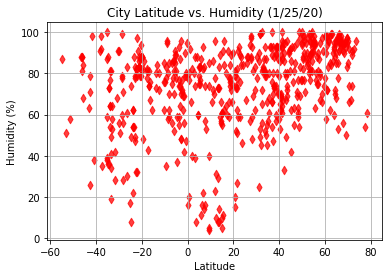

In [6]:
#Hold lists with data for each axis
x_axis = weather_df['Lat']
y_axis = weather_df['Humidity']

#Build scatter plot
plt.scatter(x_axis, y_axis, marker = 'd', alpha = 0.75, c='r')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity (1/25/20)')
plt.grid()
plt.savefig('../output_data/lat_vs_humidity.png')
plt.show

Plot visualizes the relationship between latitude and humidity. There is cluster of high humidity values in the Northern hemisphere; there's few humidity values below 40% in latitudes greater than 40 degrees.

## Latitude vs. Cloudiness Plot

<function matplotlib.pyplot.show(*args, **kw)>

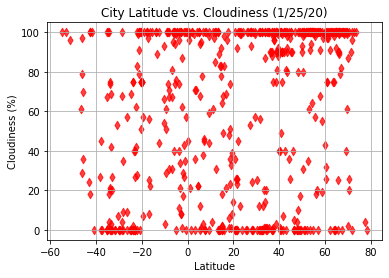

In [7]:
#Hold lists with data for each axis
x_axis = weather_df['Lat']
y_axis = weather_df['Cloudiness']

#Build scatter plot
plt.scatter(x_axis, y_axis, marker = 'd', alpha = 0.75, c='r')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness (1/25/20)')
plt.grid()
plt.savefig('../output_data/lat_vs_cloudiness.png')
plt.show

Plot visualizes the relationship between latitude and cloudiness. The spread of the data almost appears random if there are any clouds in the sky. The data seems to cluster around the max and minimum values of 0% cloudiness and 100% cloudiness.

## Latitude vs. Wind Speed Plot

<function matplotlib.pyplot.show(*args, **kw)>

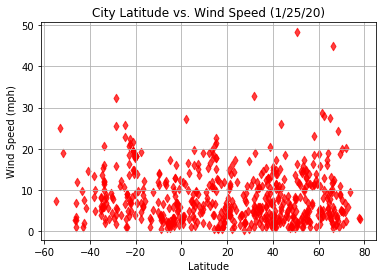

In [8]:
#Hold lists with data for each axis
x_axis = weather_df['Lat']
y_axis = weather_df['Wind Speed']

#Build scatter plot
plt.scatter(x_axis, y_axis, marker = 'd', alpha = 0.75, c='r')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs. Wind Speed (1/25/20)')
plt.grid()
plt.savefig('../output_data/lat_vs_wind_speed.png')
plt.show

Plot visualizes the relationship between latitude and wind speed. The wind speed seems to favor moderate to low values. There are few locations with wind speed above 30 mph.

## Linear Regression

In [9]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = weather_df.loc[weather_df['Lat'] >= 0]
southern_df = weather_df.loc[weather_df['Lat'] < 0]

## Northern Hemisphere - Max Temp vs. Latitude Linear Regression

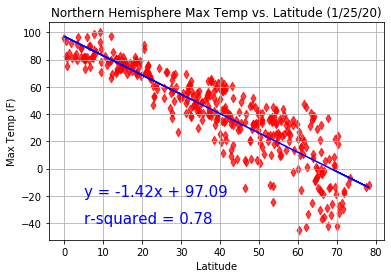

In [10]:
#Hold lists with data for each axis
x_axis = northern_df['Lat']
y_axis = northern_df['Max Temp']

#Linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'

#Build scatter plot
plt.scatter(x_axis, y_axis, marker = 'd', alpha = 0.75, c='r')
plt.plot(x_axis, regress_values, 'b-', )
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title('Northern Hemisphere Max Temp vs. Latitude (1/25/20)')
plt.annotate(line_eq, (5, -20), fontsize = 15, color = 'blue')
plt.annotate(f'r-squared = {round(rvalue*rvalue, 2)}', (5, -40), fontsize = 15, color = 'blue')
plt.grid()
plt.savefig('../output_data/nh_max_temp_vs_latitude.png')
plt.show()

The linear regression model shows evidence for correlation between latitude and max temp in latitudes between 0 and 40 degrees. If one goes above 40 degrees there data points are more spread out. From the equation temperature decreases by 1.34 degrees F for every increasing degree of latitude.

##  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

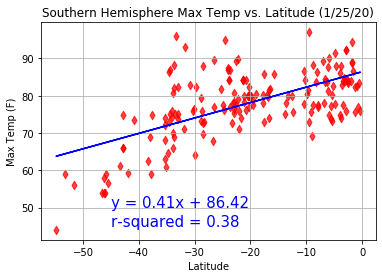

In [11]:
#Hold lists with data for each axis
x_axis = southern_df['Lat']
y_axis = southern_df['Max Temp']

#Linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'

#Scatter plot
plt.scatter(x_axis, y_axis, marker = 'd', alpha = 0.75, c='r')
plt.plot(x_axis, regress_values, 'b-', )
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title('Southern Hemisphere Max Temp vs. Latitude (1/25/20)')
plt.annotate(line_eq, (-45, 50), fontsize = 15, color = 'blue')
plt.annotate(f'r-squared = {round(rvalue*rvalue, 2)}', (-45, 45), fontsize = 15, color = 'blue')
plt.grid()
plt.savefig('../output_data/sh_max_temp_vs_latitude.png')
plt.show()

The linear regression model shows a weak correlation between latitude and temperature. The max temp values vary wildly for the same latitudes.

##  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

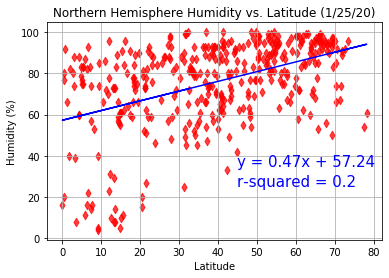

In [12]:
#Hold lists with data for each axis
x_axis = northern_df['Lat']
y_axis = northern_df['Humidity']

#Linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'

#Scatter plot
plt.scatter(x_axis, y_axis, marker = 'd', alpha = 0.75, c='r')
plt.plot(x_axis, regress_values, 'b-', )
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere Humidity vs. Latitude (1/25/20)')
plt.annotate(line_eq, (45, 35), fontsize = 15, color = 'blue')
plt.annotate(f'r-squared = {round(rvalue*rvalue, 2)}', (45, 25), fontsize = 15, color = 'blue')
plt.grid()
plt.savefig('../output_data/nh_humidity_vs_latitude.png')
plt.show()

The linear regression model shows little correlation between latitude and humidity. Values are spread almost evenly up to the 40 degrees of latitude mark.

##  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

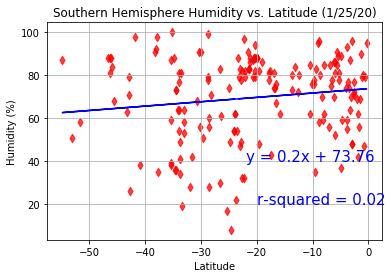

In [13]:
#Hold lists with data for each axis
x_axis = southern_df['Lat']
y_axis = southern_df['Humidity']

#Linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'

#Scatter plot
plt.scatter(x_axis, y_axis, marker = 'd', alpha = 0.75, c='r')
plt.plot(x_axis, regress_values, 'b-', )
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere Humidity vs. Latitude (1/25/20)')
plt.annotate(line_eq, (-22, 40), fontsize = 15, color = 'blue')
plt.annotate(f'r-squared = {round(rvalue*rvalue, 2)}', (-20, 20), fontsize = 15, color = 'blue')
plt.grid()
plt.savefig('../output_data/sh_humidity_vs_latitude.png')
plt.show()

The linear regression model shows little correlation between latitude and humidity. The values vary quite a lot on the Southern hemisphere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

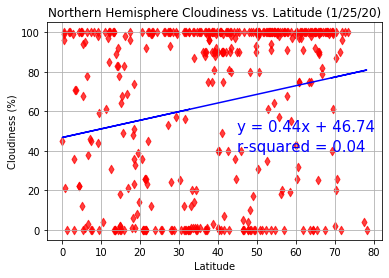

In [14]:
#Hold lists with data for each axis
x_axis = northern_df['Lat']
y_axis = northern_df['Cloudiness']

#Linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'

#Scatter plot
plt.scatter(x_axis, y_axis, marker = 'd', alpha = 0.75, c='r')
plt.plot(x_axis, regress_values, 'b-', )
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere Cloudiness vs. Latitude (1/25/20)')
plt.annotate(line_eq, (45, 50), fontsize = 15, color = 'blue')
plt.annotate(f'r-squared = {round(rvalue*rvalue, 2)}', (45, 40), fontsize = 15, color = 'blue')
plt.grid()
plt.savefig('../output_data/nh_cloudiness_vs_latitude.png')
plt.show()

The linear regression model for latitude and cloudiness shows little correlation between the variables. Data seems to be clustered around 0% and 100%. For the rest of the values they're nearly evenly spread throughout the plot.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

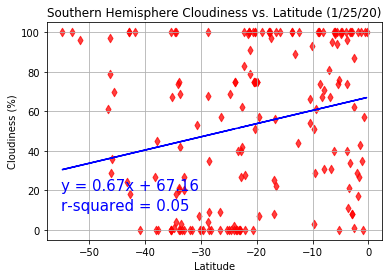

In [15]:
#Hold lists with data for each axis
x_axis = southern_df['Lat']
y_axis = southern_df['Cloudiness']

#Linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'

#Scatter plot
plt.scatter(x_axis, y_axis, marker = 'd', alpha = 0.75, c='r')
plt.plot(x_axis, regress_values, 'b-', )
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere Cloudiness vs. Latitude (1/25/20)')
plt.annotate(line_eq, (-55, 20), fontsize = 15, color = 'blue')
plt.annotate(f'r-squared = {round(rvalue*rvalue, 2)}', (-55, 10), fontsize = 15, color = 'blue')
plt.grid()
plt.savefig('../output_data/sh_cloudiness_vs_latitude.png')
plt.show()

The linear regression model for latitude and cloudiness shows little correlation. As with the Northern hemisphere model, the values cluster around 0% and 100%.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

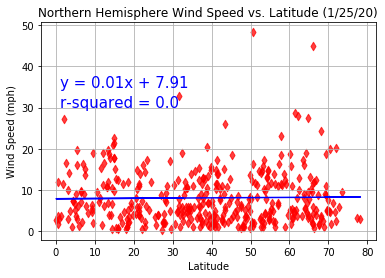

In [18]:
#Hold lists with data for each axis
x_axis = northern_df['Lat']
y_axis = northern_df['Wind Speed']

#Linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'

#Scatter plot
plt.scatter(x_axis, y_axis, marker = 'd', alpha = 0.75, c='r')
plt.plot(x_axis, regress_values, 'b-', )
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere Wind Speed vs. Latitude (1/25/20)')
plt.annotate(line_eq, (1, 35), fontsize = 15, color = 'blue')
plt.annotate(f'r-squared = {round(rvalue*rvalue, 2)}', (1, 30), fontsize = 15, color = 'blue')
plt.grid()
plt.savefig('../output_data/nh_wind_speed_vs_latitude.png')
plt.show()

The linear regression model shows little evidence of correlation between latitude and wind speed. There are few values above the 20 mph wind speed mark, while there are a few outlier values above the 50 degree latitude line.

##  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

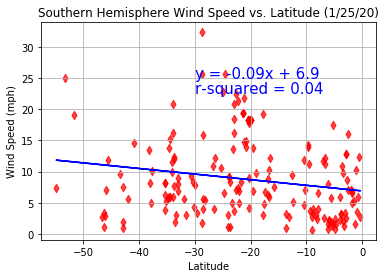

In [19]:
#Hold lists with data for each axis
x_axis = southern_df['Lat']
y_axis = southern_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept

line_eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'

plt.scatter(x_axis, y_axis, marker = 'd', alpha = 0.75, c='r')
plt.plot(x_axis, regress_values, 'b-', )
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere Wind Speed vs. Latitude (1/25/20)')
plt.annotate(line_eq, (-30, 25), fontsize = 15, color = 'blue')
plt.annotate(f'r-squared = {round(rvalue*rvalue, 2)}', (-30, 22.5), fontsize = 15, color = 'blue')
plt.grid()
plt.savefig('../output_data/sh_wind_speed_vs_latitude.png')
plt.show()

The linear regression model shows little correlation between latitude and wind speed. Wind speed values mostly lie under the 20 mph mark just as in the Northern hemisphere model.